In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sys; sys.path.append('..')
from PDE_FIND import *

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
labelfontsize = 16

Text(0, 0.5, '$x$')

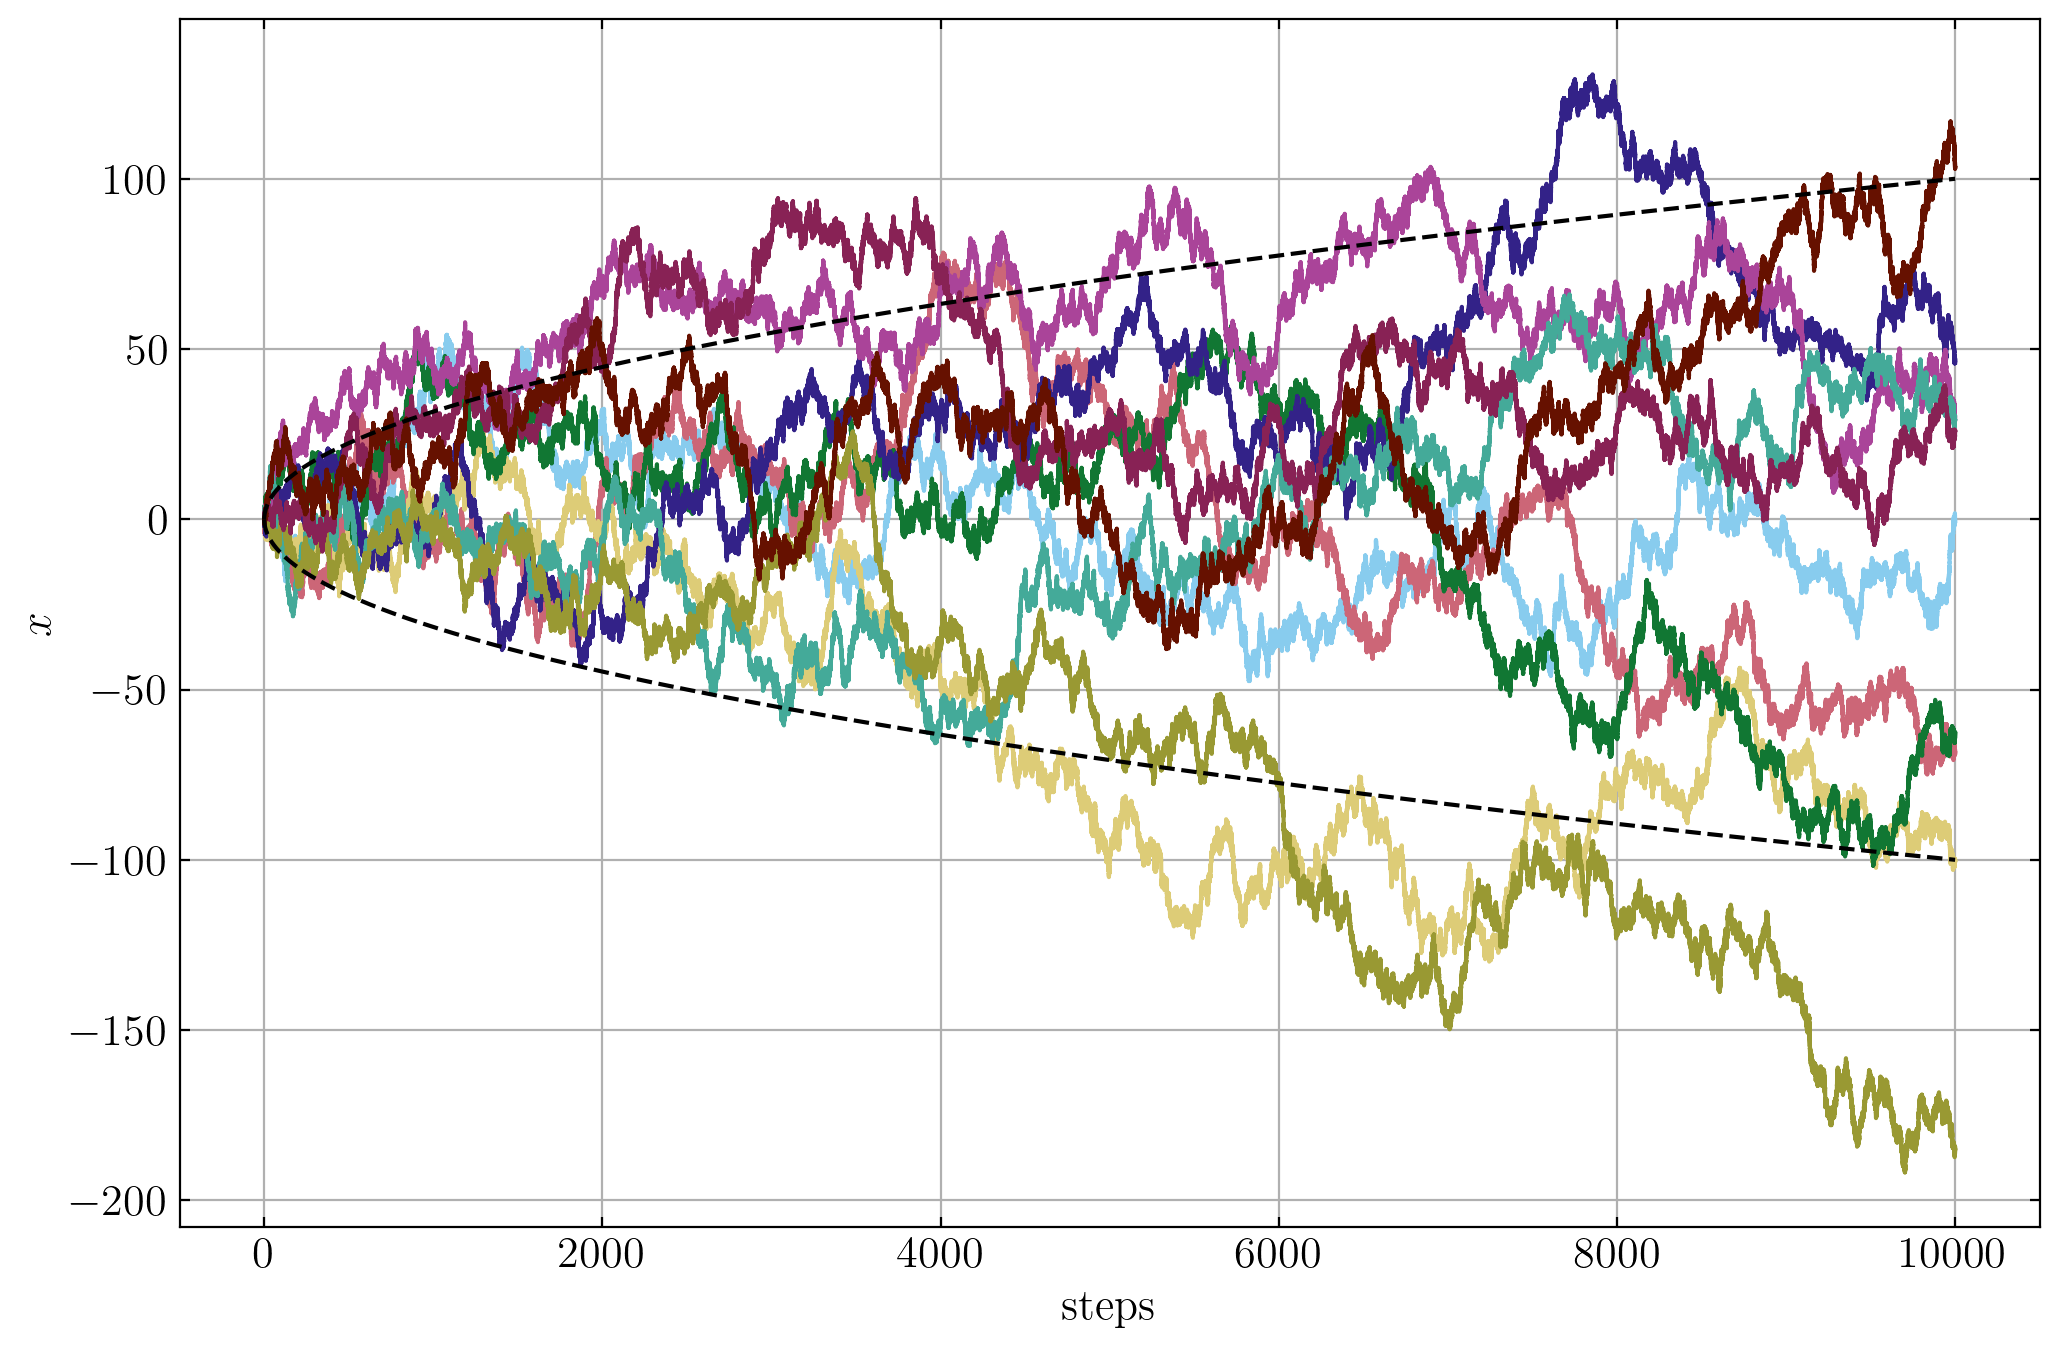

In [3]:
length = int(1e6)
dt = 0.01
time = dt*np.arange(length)
samples = 10
for _ in range(samples):
    walk = np.cumsum(np.sqrt(dt)*np.random.randn(length))
    plt.plot(time, walk)
plt.plot(time,  np.sqrt(dt*np.arange(length)), c='k', ls='--')
plt.plot(time, -np.sqrt(dt*np.arange(length)), c='k', ls='--')
plt.xlabel('steps'); plt.ylabel(r'$x$')

Text(0, 0.5, '$x$')

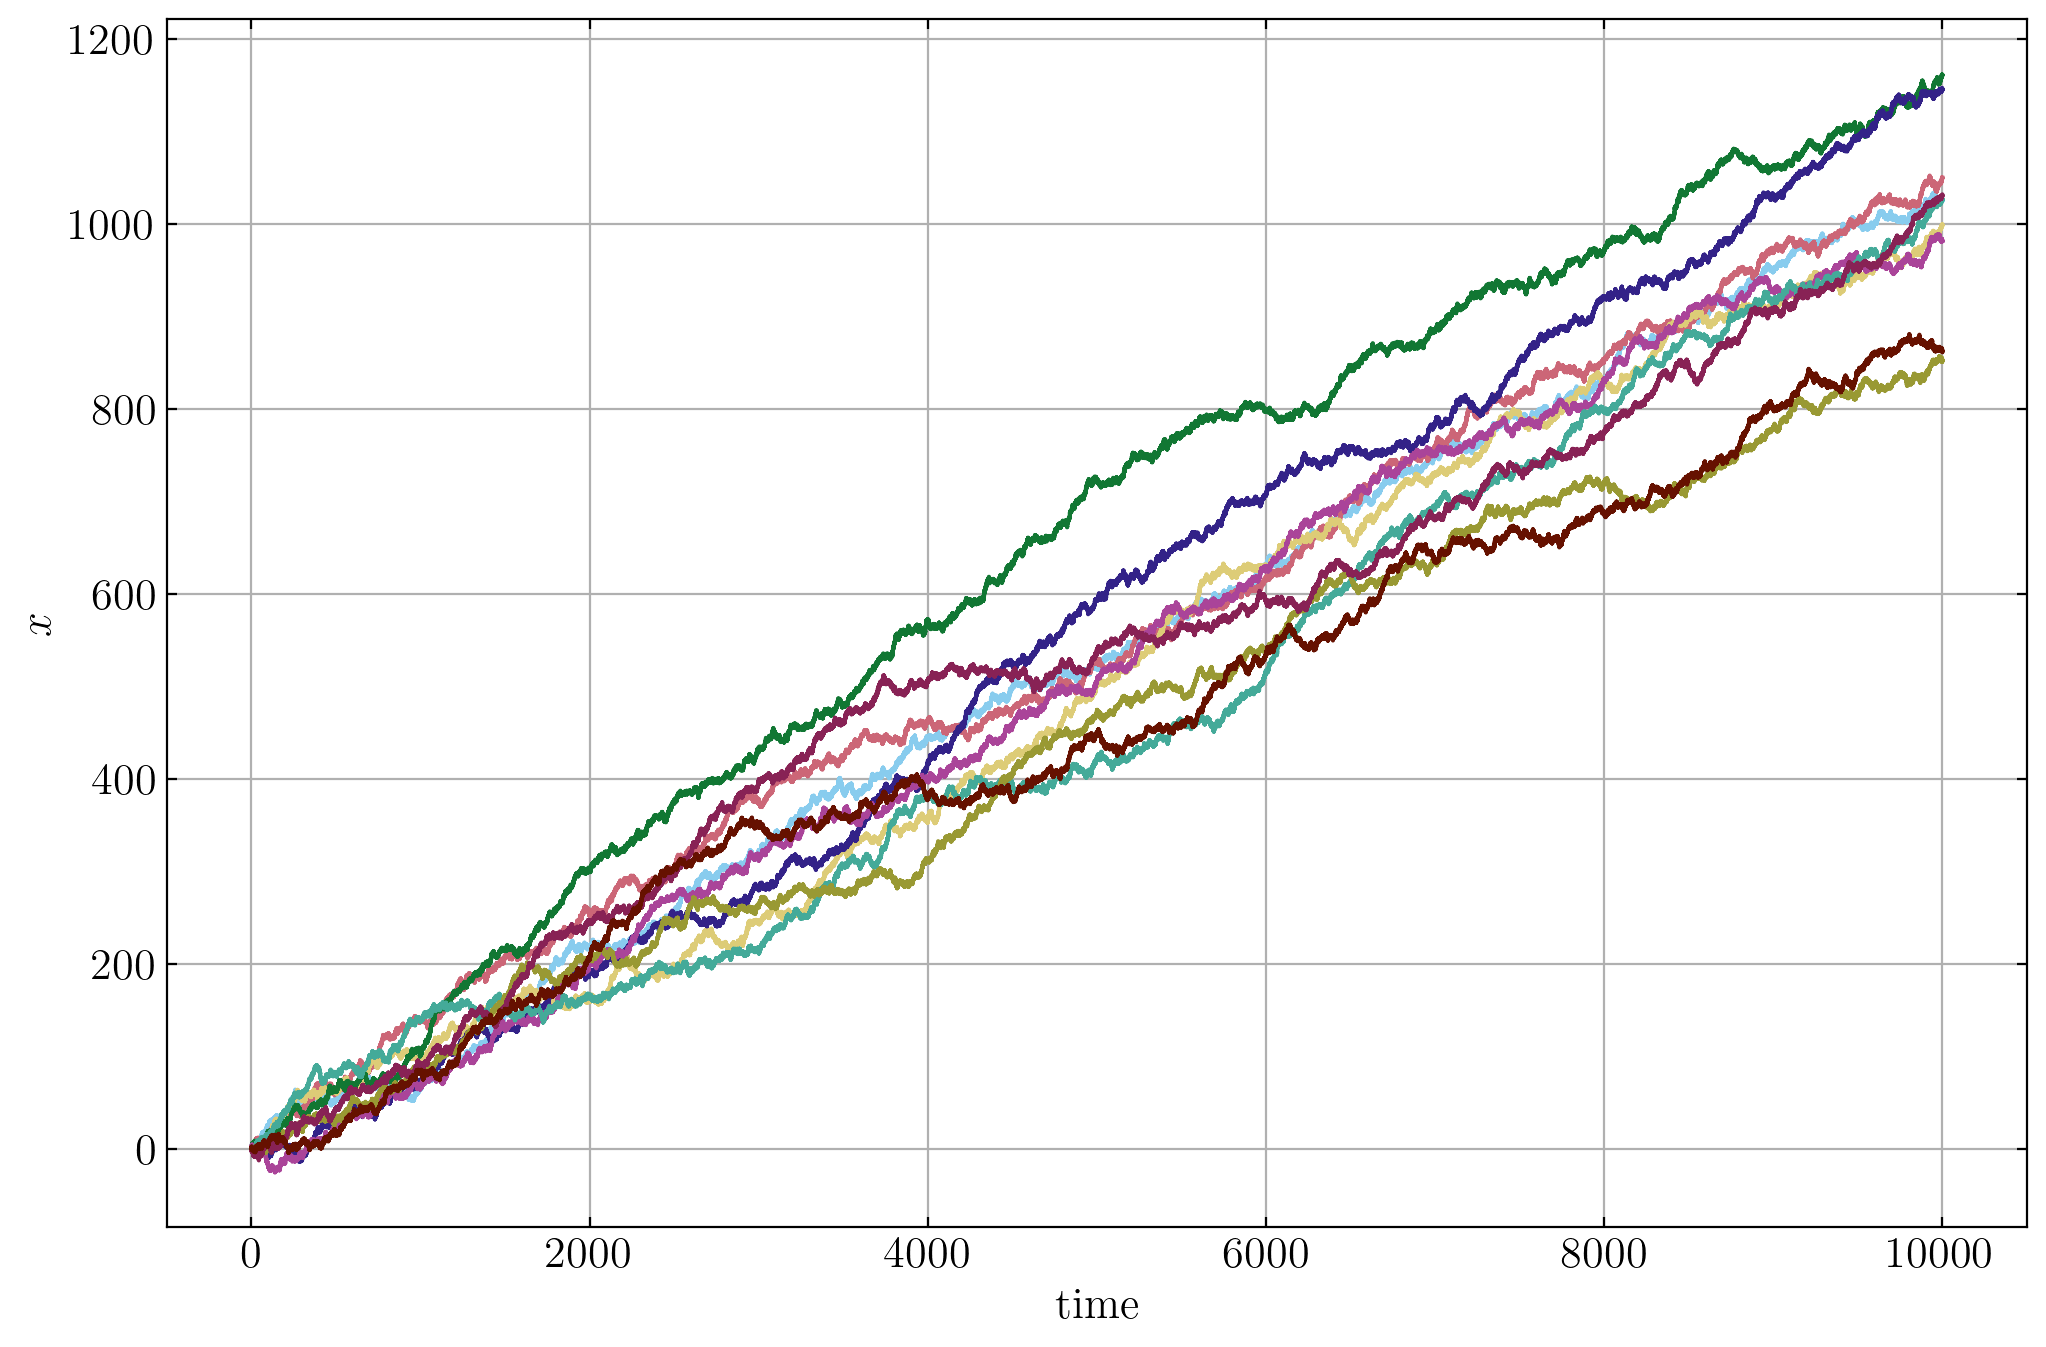

In [4]:
c = 0.1
for i in range(samples):
    advec_walk = np.cumsum(np.sqrt(dt)*np.random.randn(length)) + c*dt*np.arange(length)
    plt.plot(time, advec_walk)
plt.xlabel('time'); plt.ylabel('$x$')

(-6.0, 6.0)

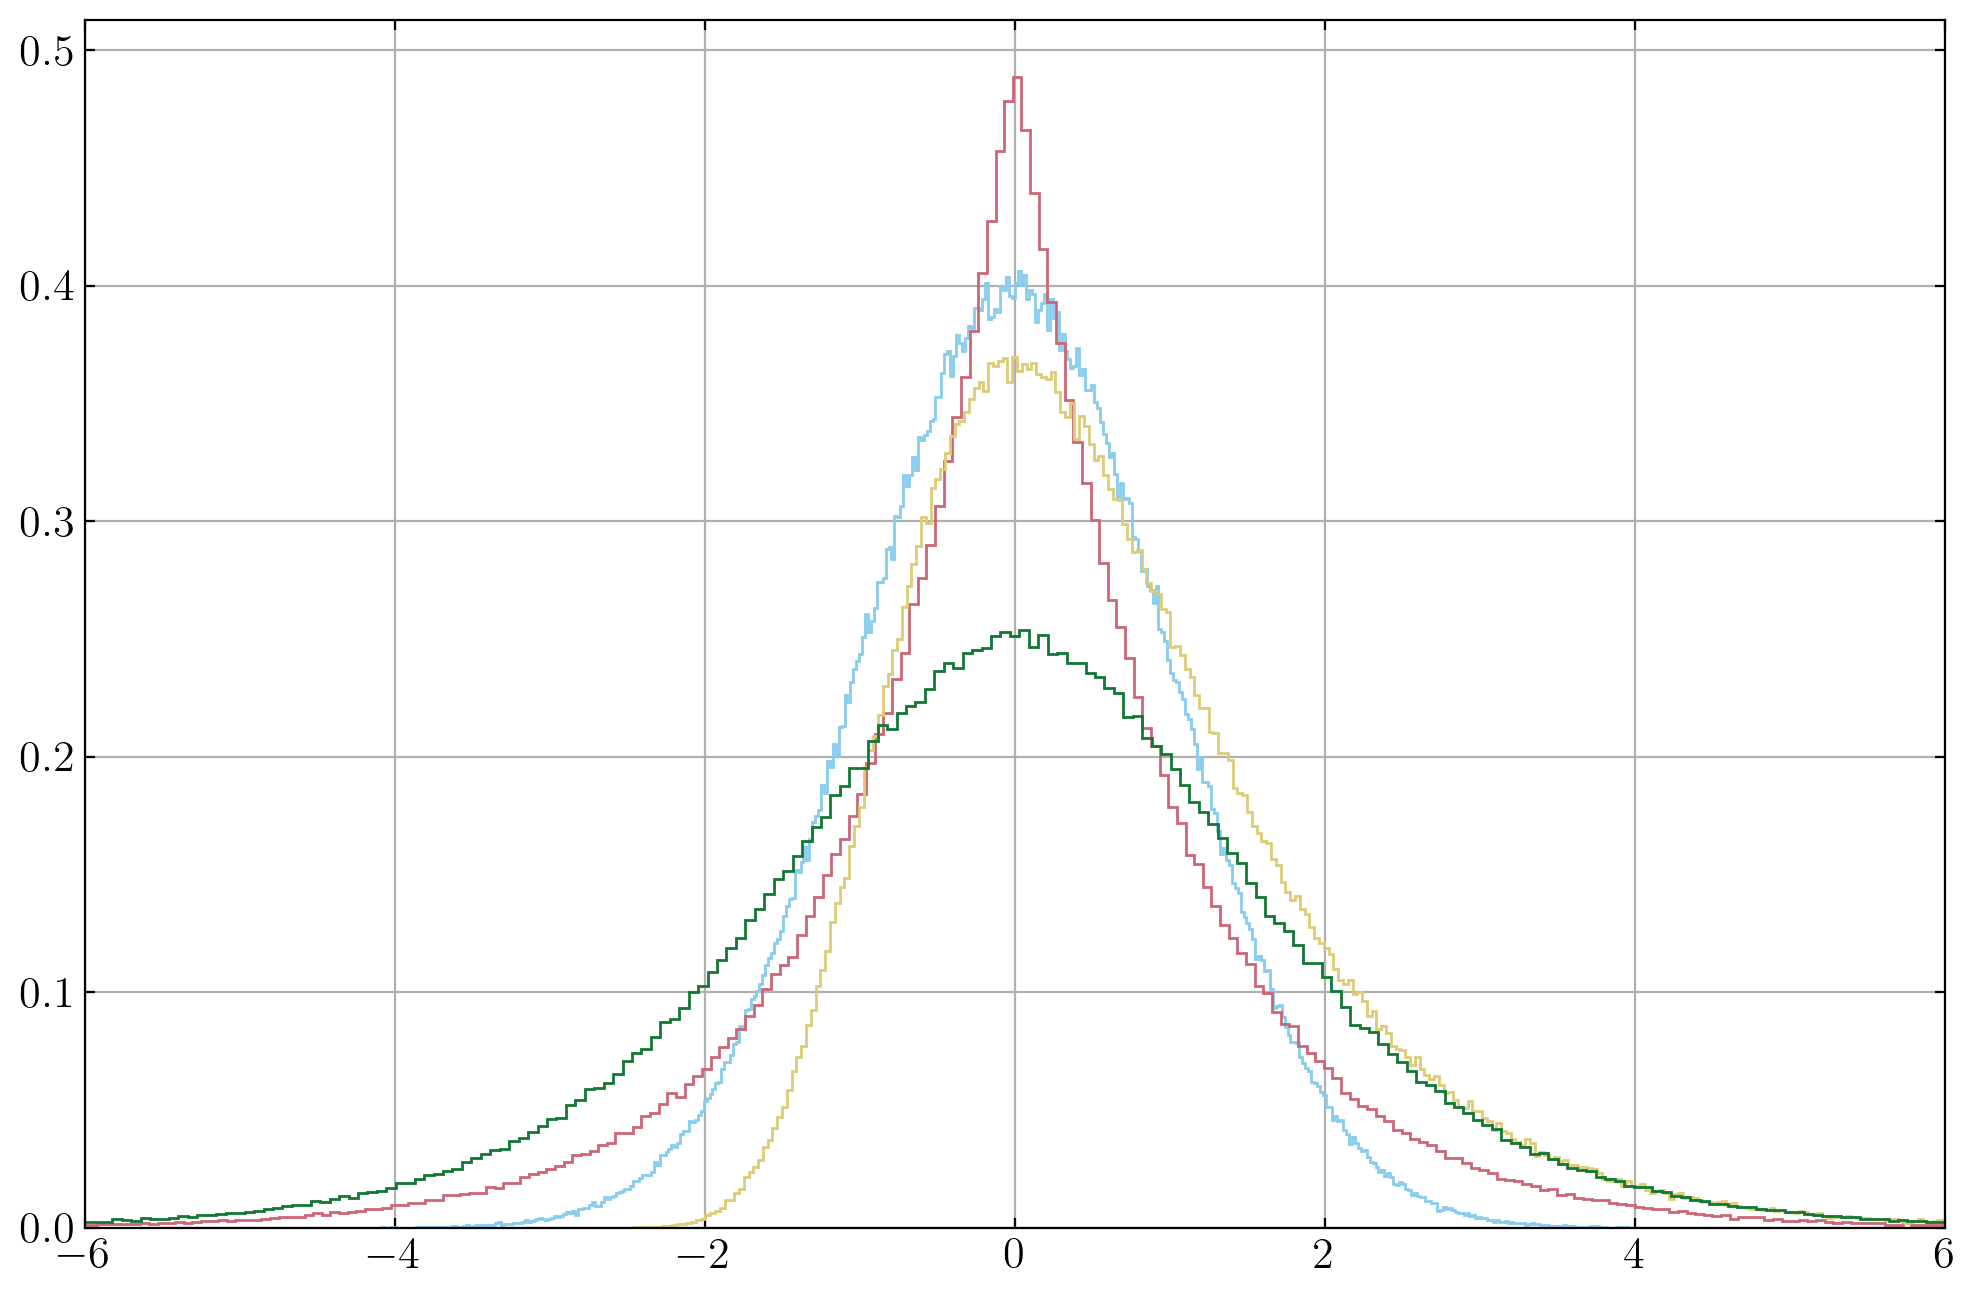

In [5]:
_ = plt.hist(np.random.normal(size=length), 500, histtype='step', density=True)
_ = plt.hist(np.random.laplace(size=length), 500, histtype='step', density=True)
_ = plt.hist(np.random.gumbel(size=length), 500, histtype='step', density=True)
_ = plt.hist(np.random.logistic(size=length), 500, histtype='step', density=True)
plt.xlim(-6, 6)

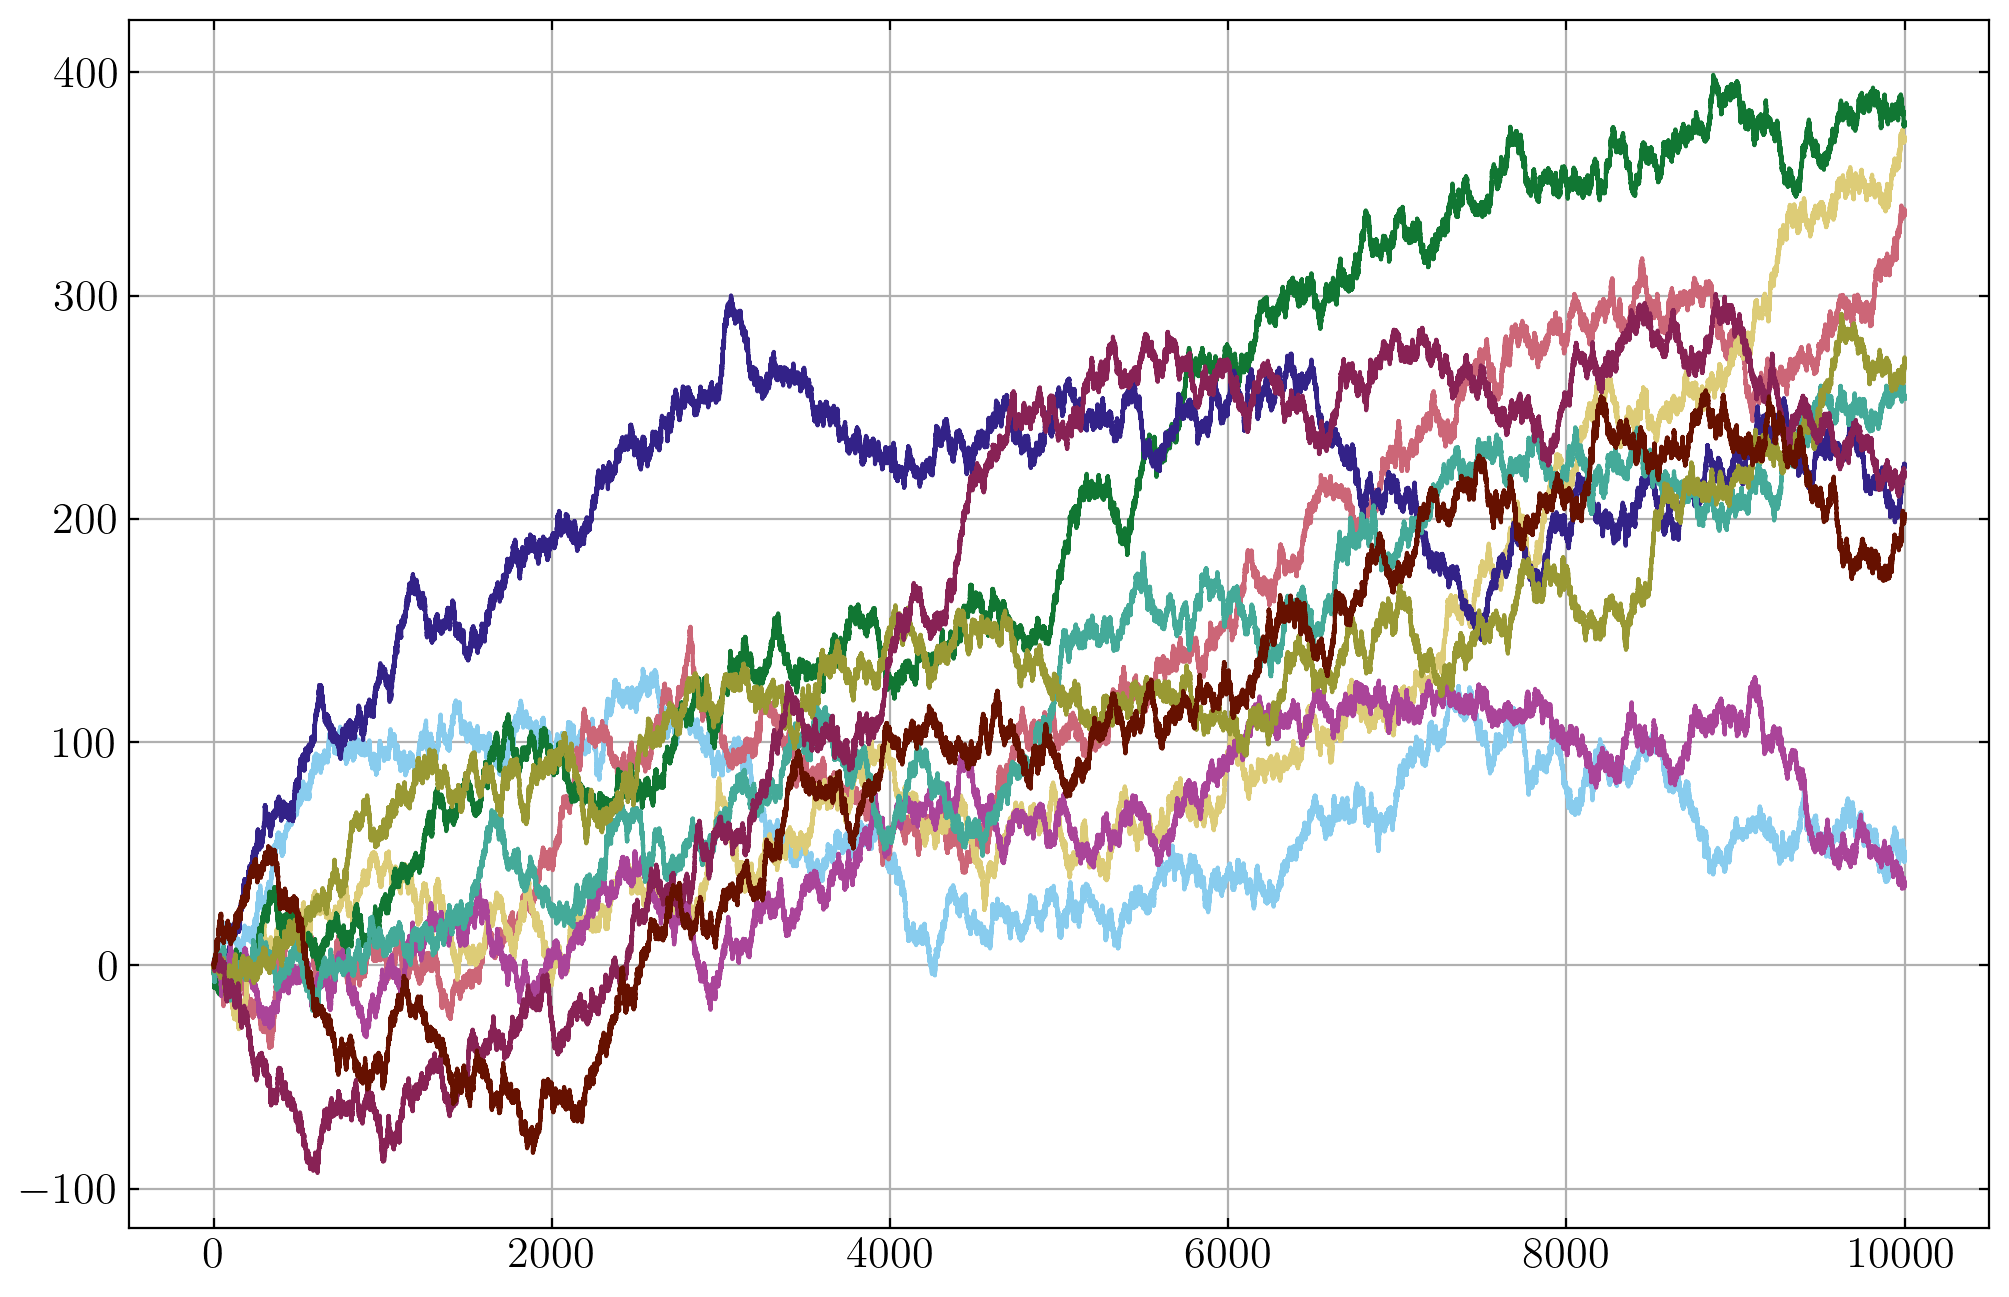

In [6]:
for _ in range(samples):
    walk = np.cumsum(np.sqrt(dt)*np.random.gumbel(loc=-0.575, size=length))
    plt.plot(time, walk)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


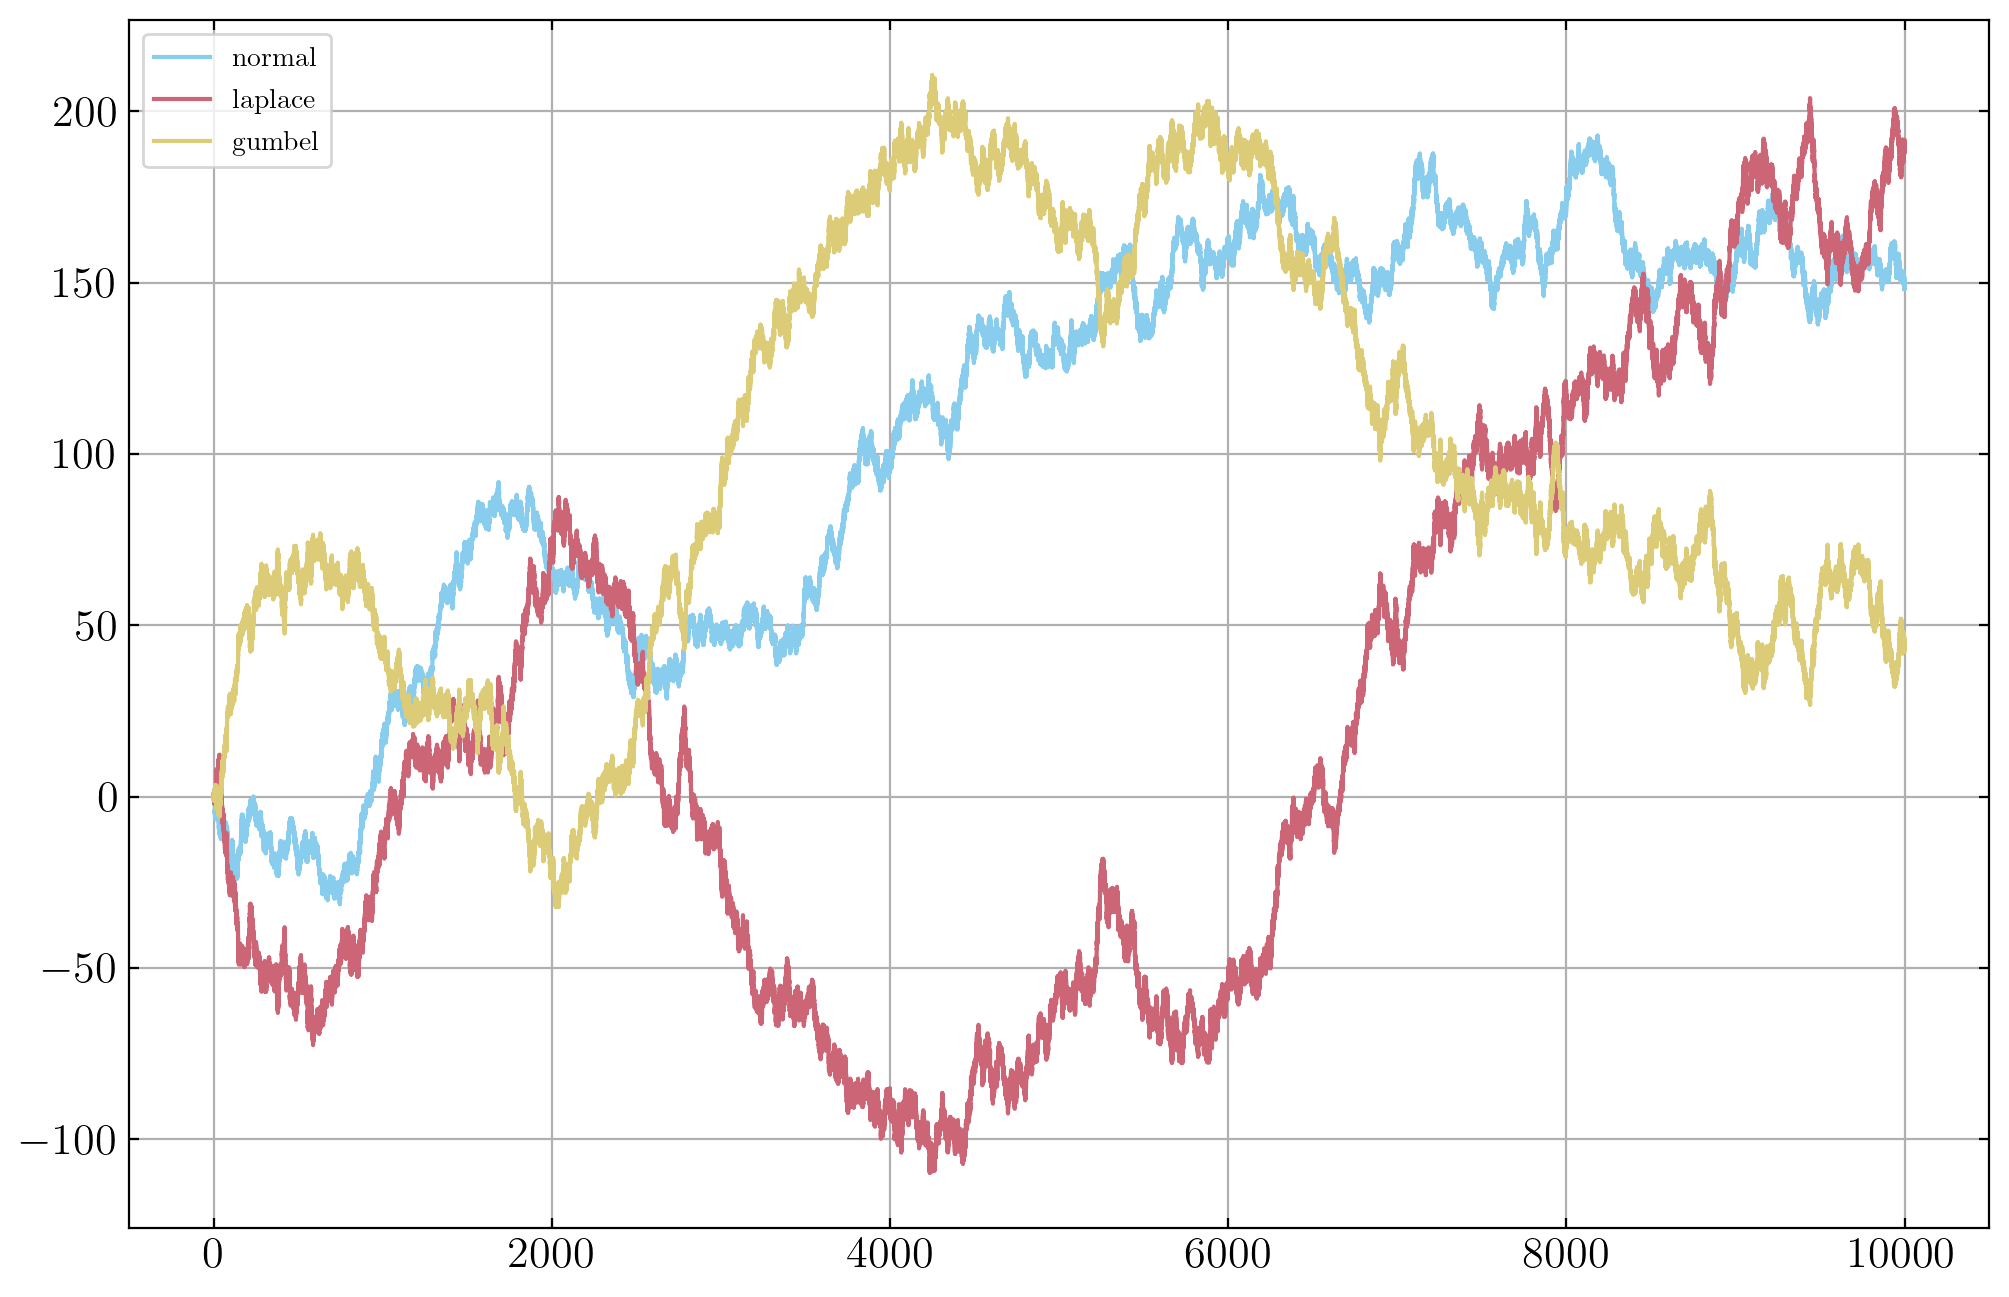

In [7]:
distributions = [('normal', 0), ('laplace', 0), ('gumbel', -0.575)]
for d, l in distributions:
    func = getattr(np.random.RandomState(0), d)
    walk = np.cumsum(np.sqrt(dt)*func(loc=l, size=length))
    plt.plot(time, walk, label=d)
plt.legend()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


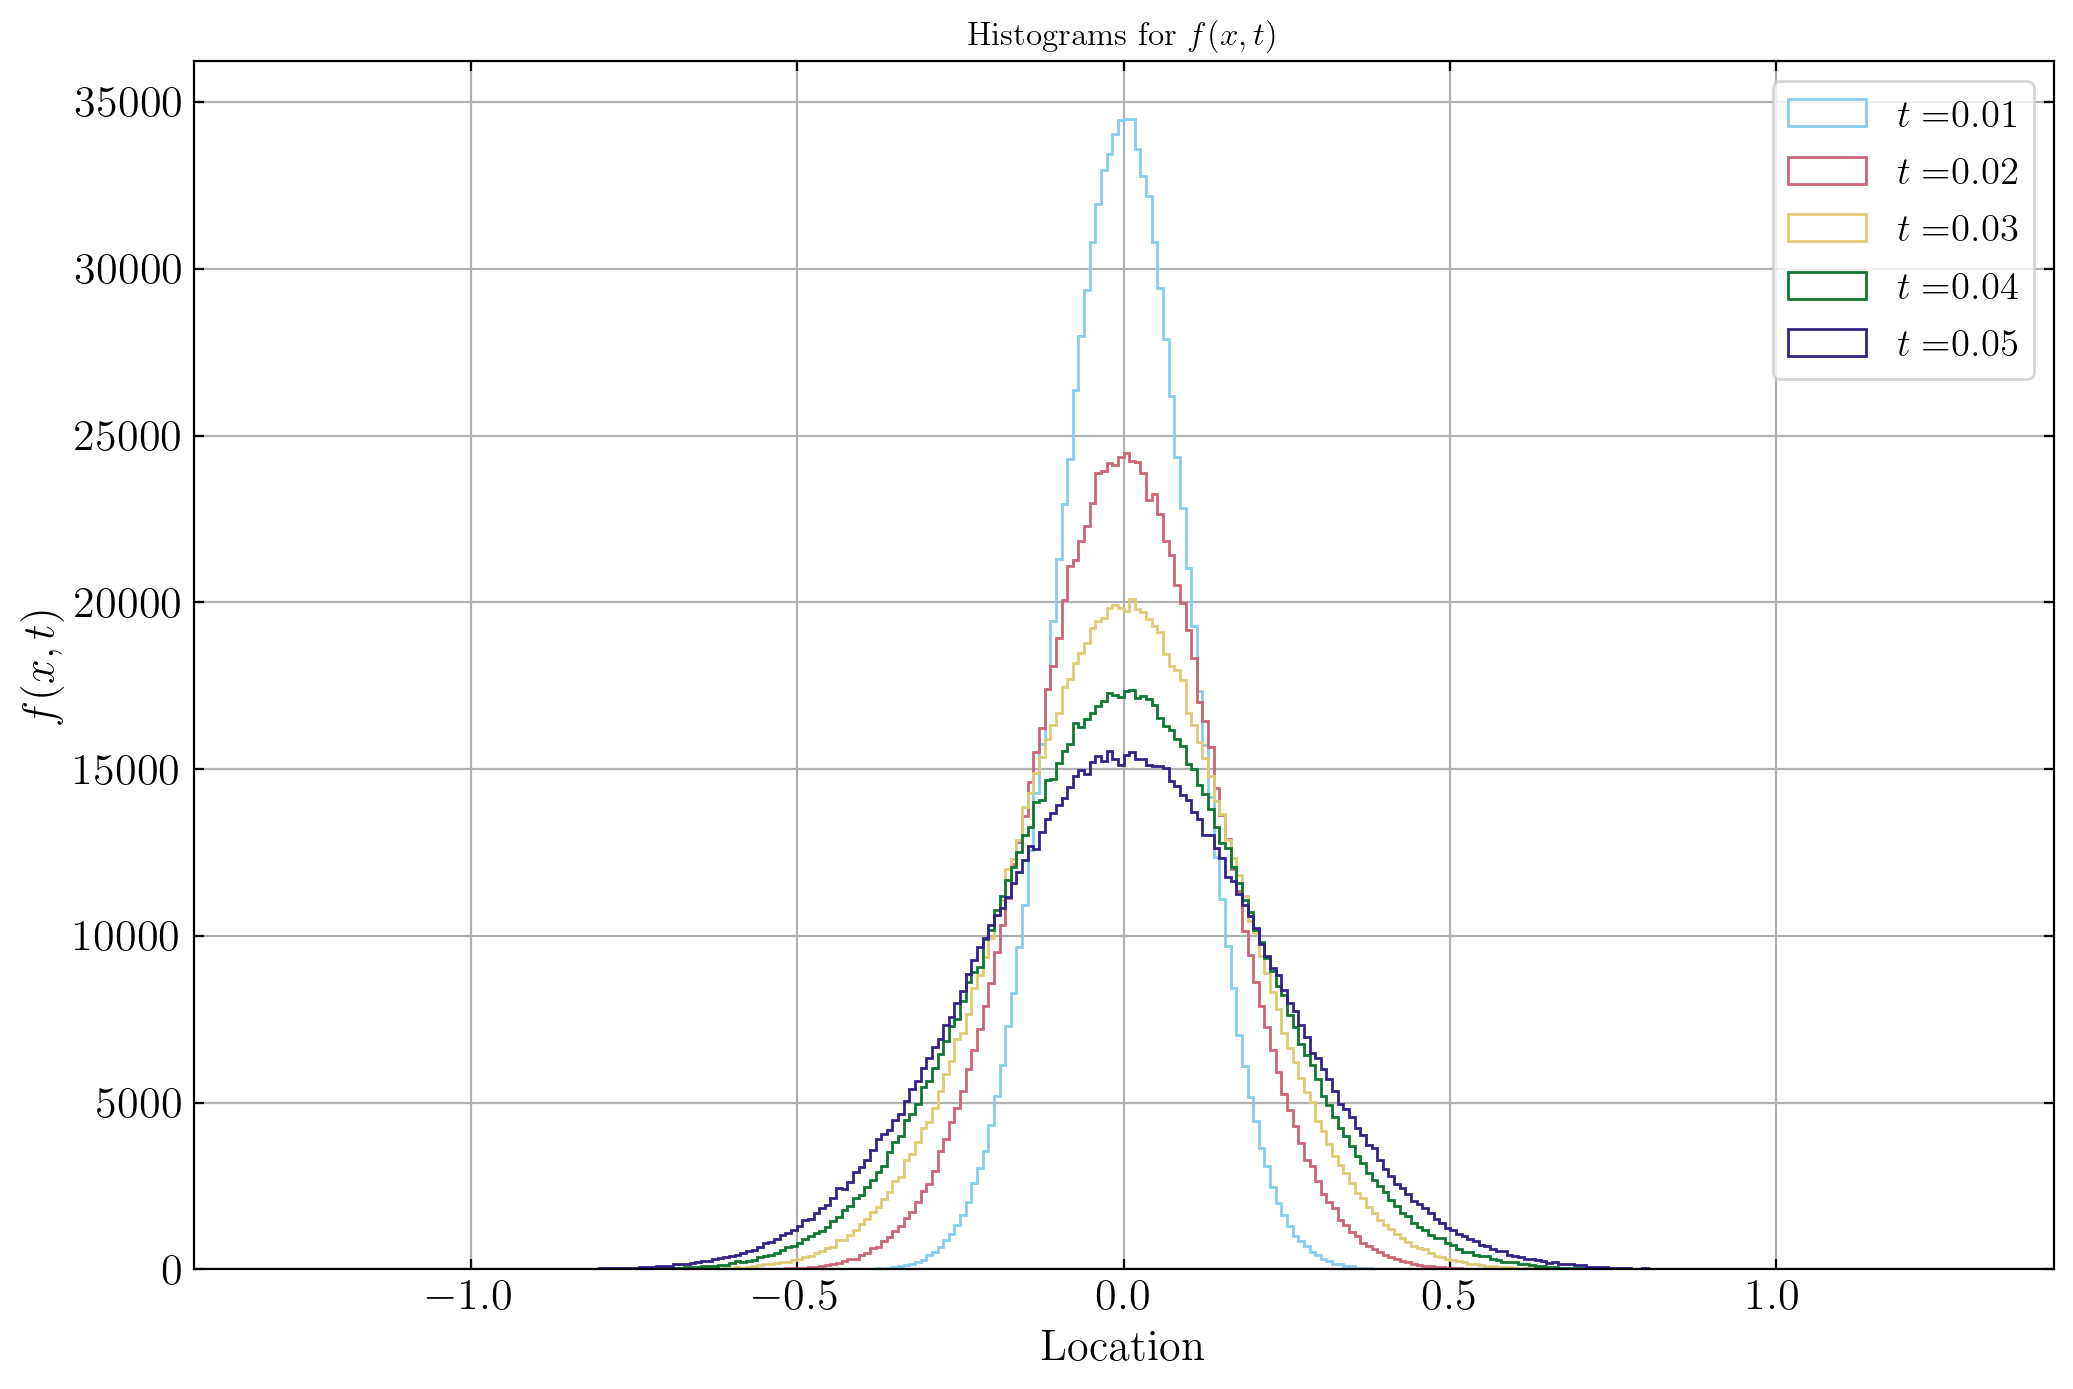

In [8]:
walk = np.cumsum(np.sqrt(dt)*np.random.normal(size=length))

P = {}
M = 0

m = 5
n = 300

for i in range(m):
    P[i] = []

for i in range(len(walk)-m):

    # center
    y = walk[i+1:i+m+1] - walk[i]
    M = max([M, max(abs(y))])

    # add to distribution
    for j in range(m):
        P[j].append(y[j])

bins = np.linspace(-M,M,n+1)
x = np.linspace(M*(1/n-1),M*(1-1/n),n)
dx = x[2]-x[1]
T = np.linspace(0,dt*(m-1),m)
U = np.zeros((n,m))
for i in range(m):
    U[:,i] = plt.hist(P[i],bins,label=r'$t = $' + str(i*dt+dt), histtype='step')[0]/float(dx*(len(walk)-m))

plt.xlabel('Location')
plt.ylabel(r'$f(x,t)$')
plt.title(r'Histograms for $f(x,t)$')
plt.legend(loc = 'upper right', fontsize = 14)

In [10]:
Ut,R,rhs_des = build_linear_system(U, dt, dx, D=4, P=5, time_diff = 'FD', space_diff = 'poly', deg_x = 4)

print("Candidate functions for PDE")
for func in ['1'] + rhs_des[1:]:
    print(func)

print("\nPDE derived from data:")
w = TrainSTRidge(R, Ut, 10**-2, 10, normalize = 2)
print_pde(w, rhs_des)

# w = TrainSTRidge(R, Ut, 10**-2, 10, normalize = 0)
# print_pde(w, rhs_des)

# w = FoBaGreedy(R, Ut,10)
# print_pde(w, rhs_des)

# w = Lasso(R, Ut, 350)
# print_pde(w, rhs_des)

Candidate functions for PDE
1
u
u^2
u^3
u^4
u^5
u_{x}
uu_{x}
u^2u_{x}
u^3u_{x}
u^4u_{x}
u^5u_{x}
u_{xx}
uu_{xx}
u^2u_{xx}
u^3u_{xx}
u^4u_{xx}
u^5u_{xx}
u_{xxx}
uu_{xxx}
u^2u_{xxx}
u^3u_{xxx}
u^4u_{xxx}
u^5u_{xxx}
u_{xxxx}
uu_{xxxx}
u^2u_{xxxx}
u^3u_{xxxx}
u^4u_{xxxx}
u^5u_{xxxx}

PDE derived from data:
u_t = (0.520092 +0.000000i)u_{xx}
   


..\PDE_FIND.py:443: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w_best = np.linalg.lstsq(TrainR, TrainY)[0]
..\PDE_FIND.py:589: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if lam != 0: w = np.linalg.lstsq(X.T.dot(X) + lam*np.eye(d),X.T.dot(y))[0]
..\PDE_FIND.py:615: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old,

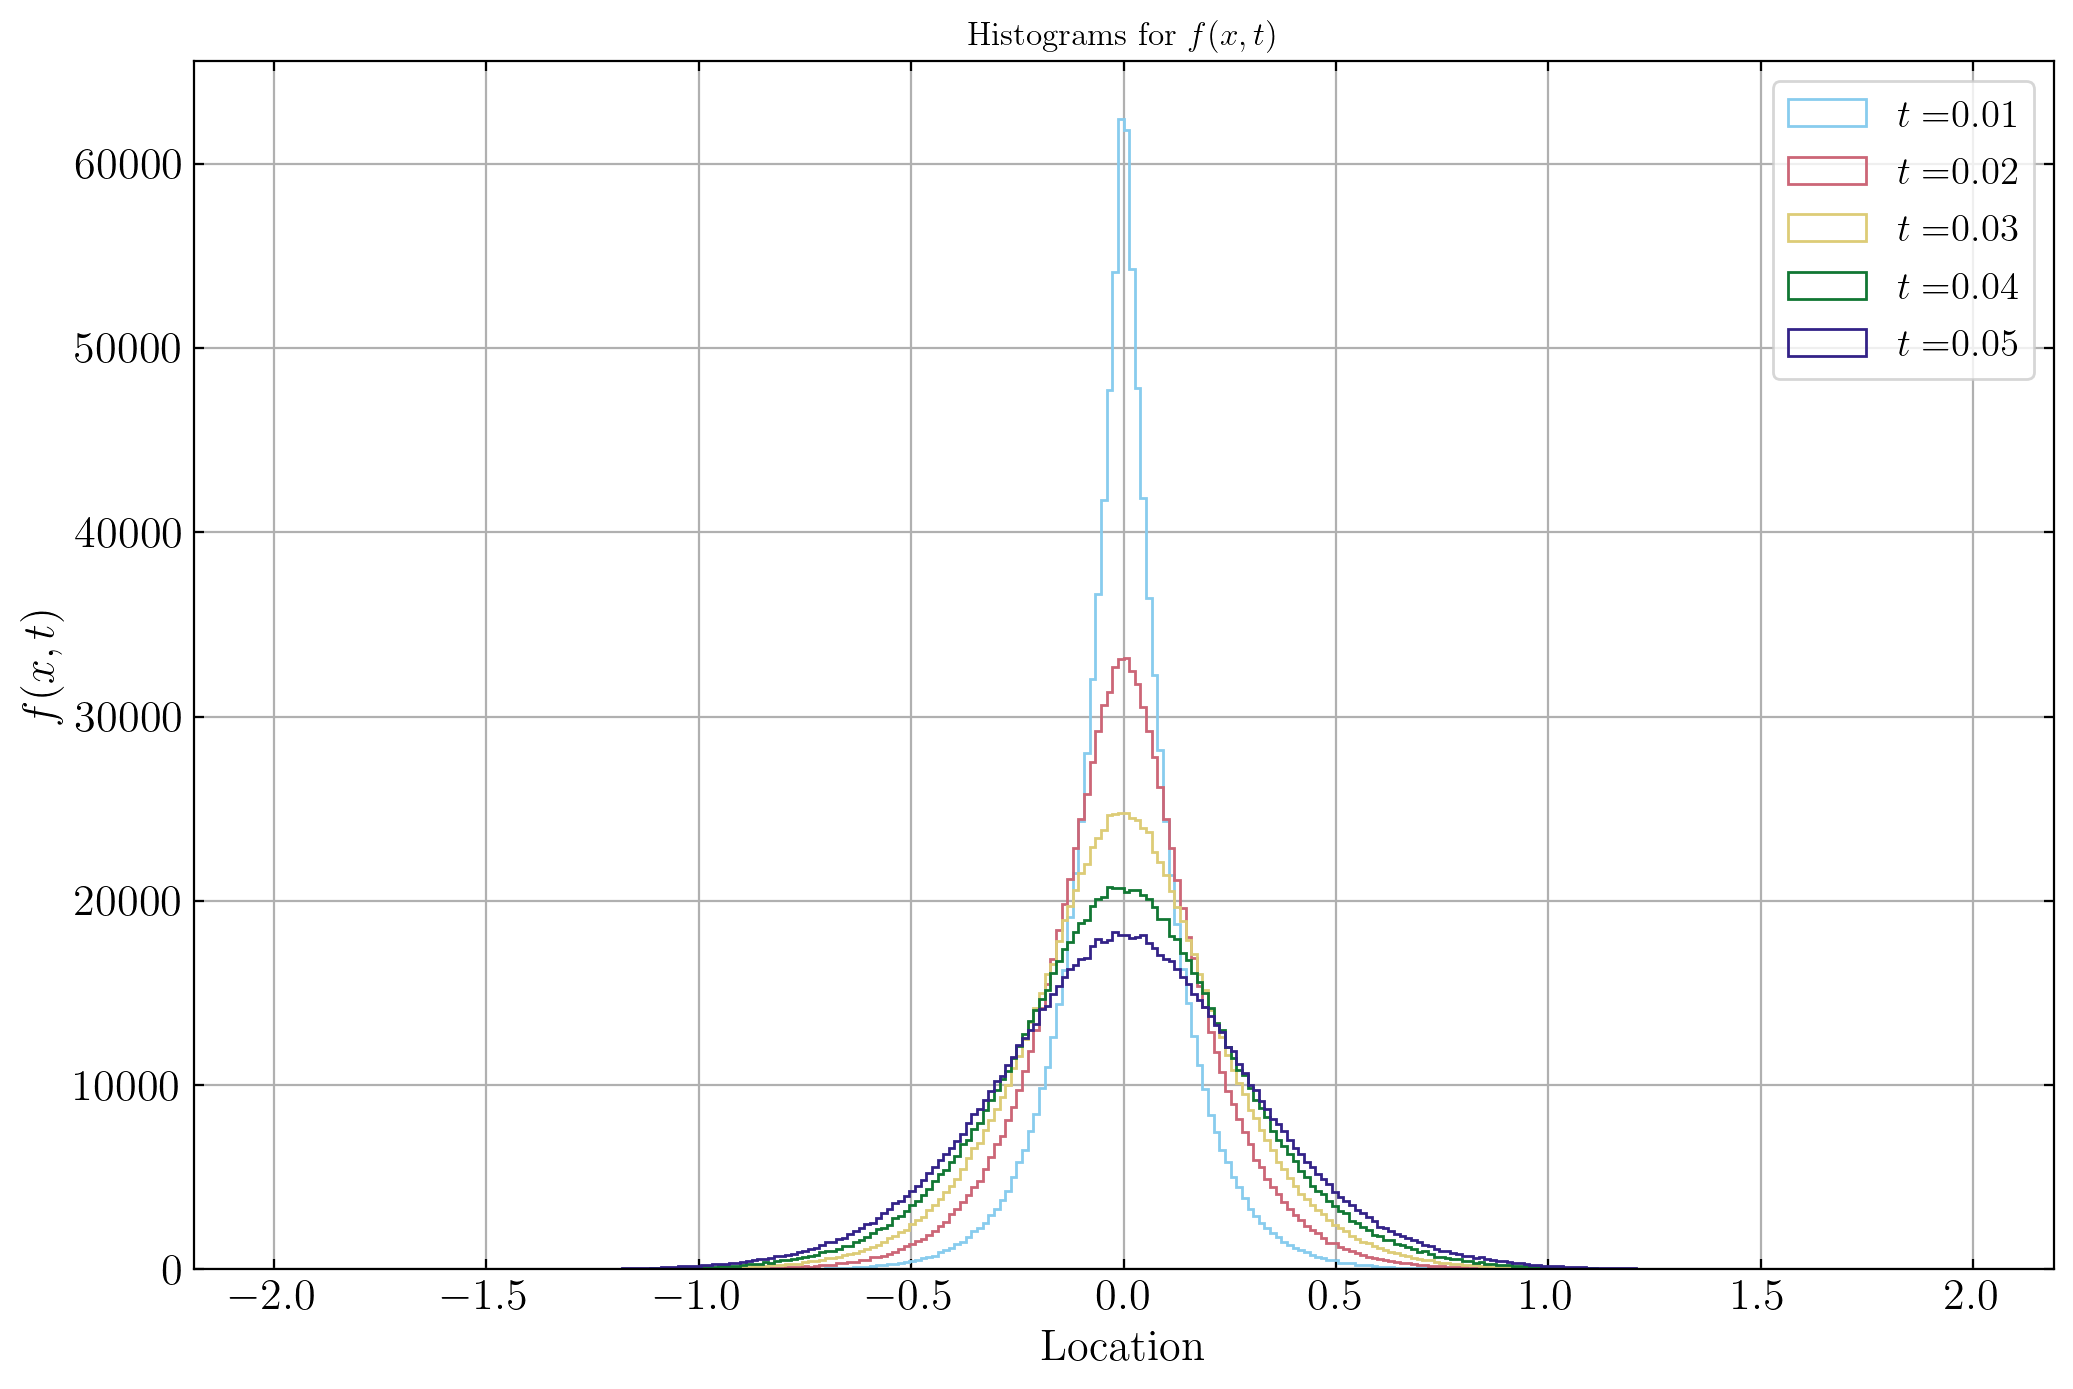

In [11]:
walk = np.cumsum(np.sqrt(dt)*np.random.laplace(size=length))

P = {}
M = 0

m = 5
n = 300

for i in range(m):
    P[i] = []

for i in range(len(walk)-m):

    # center
    y = walk[i+1:i+m+1] - walk[i]
    M = max([M, max(abs(y))])

    # add to distribution
    for j in range(m):
        P[j].append(y[j])

bins = np.linspace(-M,M,n+1)
x = np.linspace(M*(1/n-1),M*(1-1/n),n)
dx = x[2]-x[1]
T = np.linspace(0,dt*(m-1),m)
U = np.zeros((n,m))
for i in range(m):
    U[:,i] = plt.hist(P[i],bins,label=r'$t = $' + str(i*dt+dt), histtype='step')[0]/float(dx*(len(walk)-m))

plt.xlabel('Location')
plt.ylabel(r'$f(x,t)$')
plt.title(r'Histograms for $f(x,t)$')
plt.legend(loc = 'upper right', fontsize = 14)

In [13]:
Ut,R,rhs_des = build_linear_system(U, dt, dx, D=4, P=5, time_diff = 'FD', space_diff = 'poly', deg_x = 4)

print("Candidate functions for PDE")
for func in ['1'] + rhs_des[1:]:
    print(func)

print("\nPDE derived from data:")
w = TrainSTRidge(R, Ut, 10**-2, 10, normalize = 2)
print_pde(w, rhs_des)

Candidate functions for PDE
1
u
u^2
u^3
u^4
u^5
u_{x}
uu_{x}
u^2u_{x}
u^3u_{x}
u^4u_{x}
u^5u_{x}
u_{xx}
uu_{xx}
u^2u_{xx}
u^3u_{xx}
u^4u_{xx}
u^5u_{xx}
u_{xxx}
uu_{xxx}
u^2u_{xxx}
u^3u_{xxx}
u^4u_{xxx}
u^5u_{xxx}
u_{xxxx}
uu_{xxxx}
u^2u_{xxxx}
u^3u_{xxxx}
u^4u_{xxxx}
u^5u_{xxxx}

PDE derived from data:


..\PDE_FIND.py:443: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w_best = np.linalg.lstsq(TrainR, TrainY)[0]
..\PDE_FIND.py:589: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if lam != 0: w = np.linalg.lstsq(X.T.dot(X) + lam*np.eye(d),X.T.dot(y))[0]
..\PDE_FIND.py:615: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old,

u_t = (19.323250 +0.000000i)u
    + (-15.194511 +0.000000i)u^2
    + (-0.001763 +0.000000i)uu_{xxxx}
   


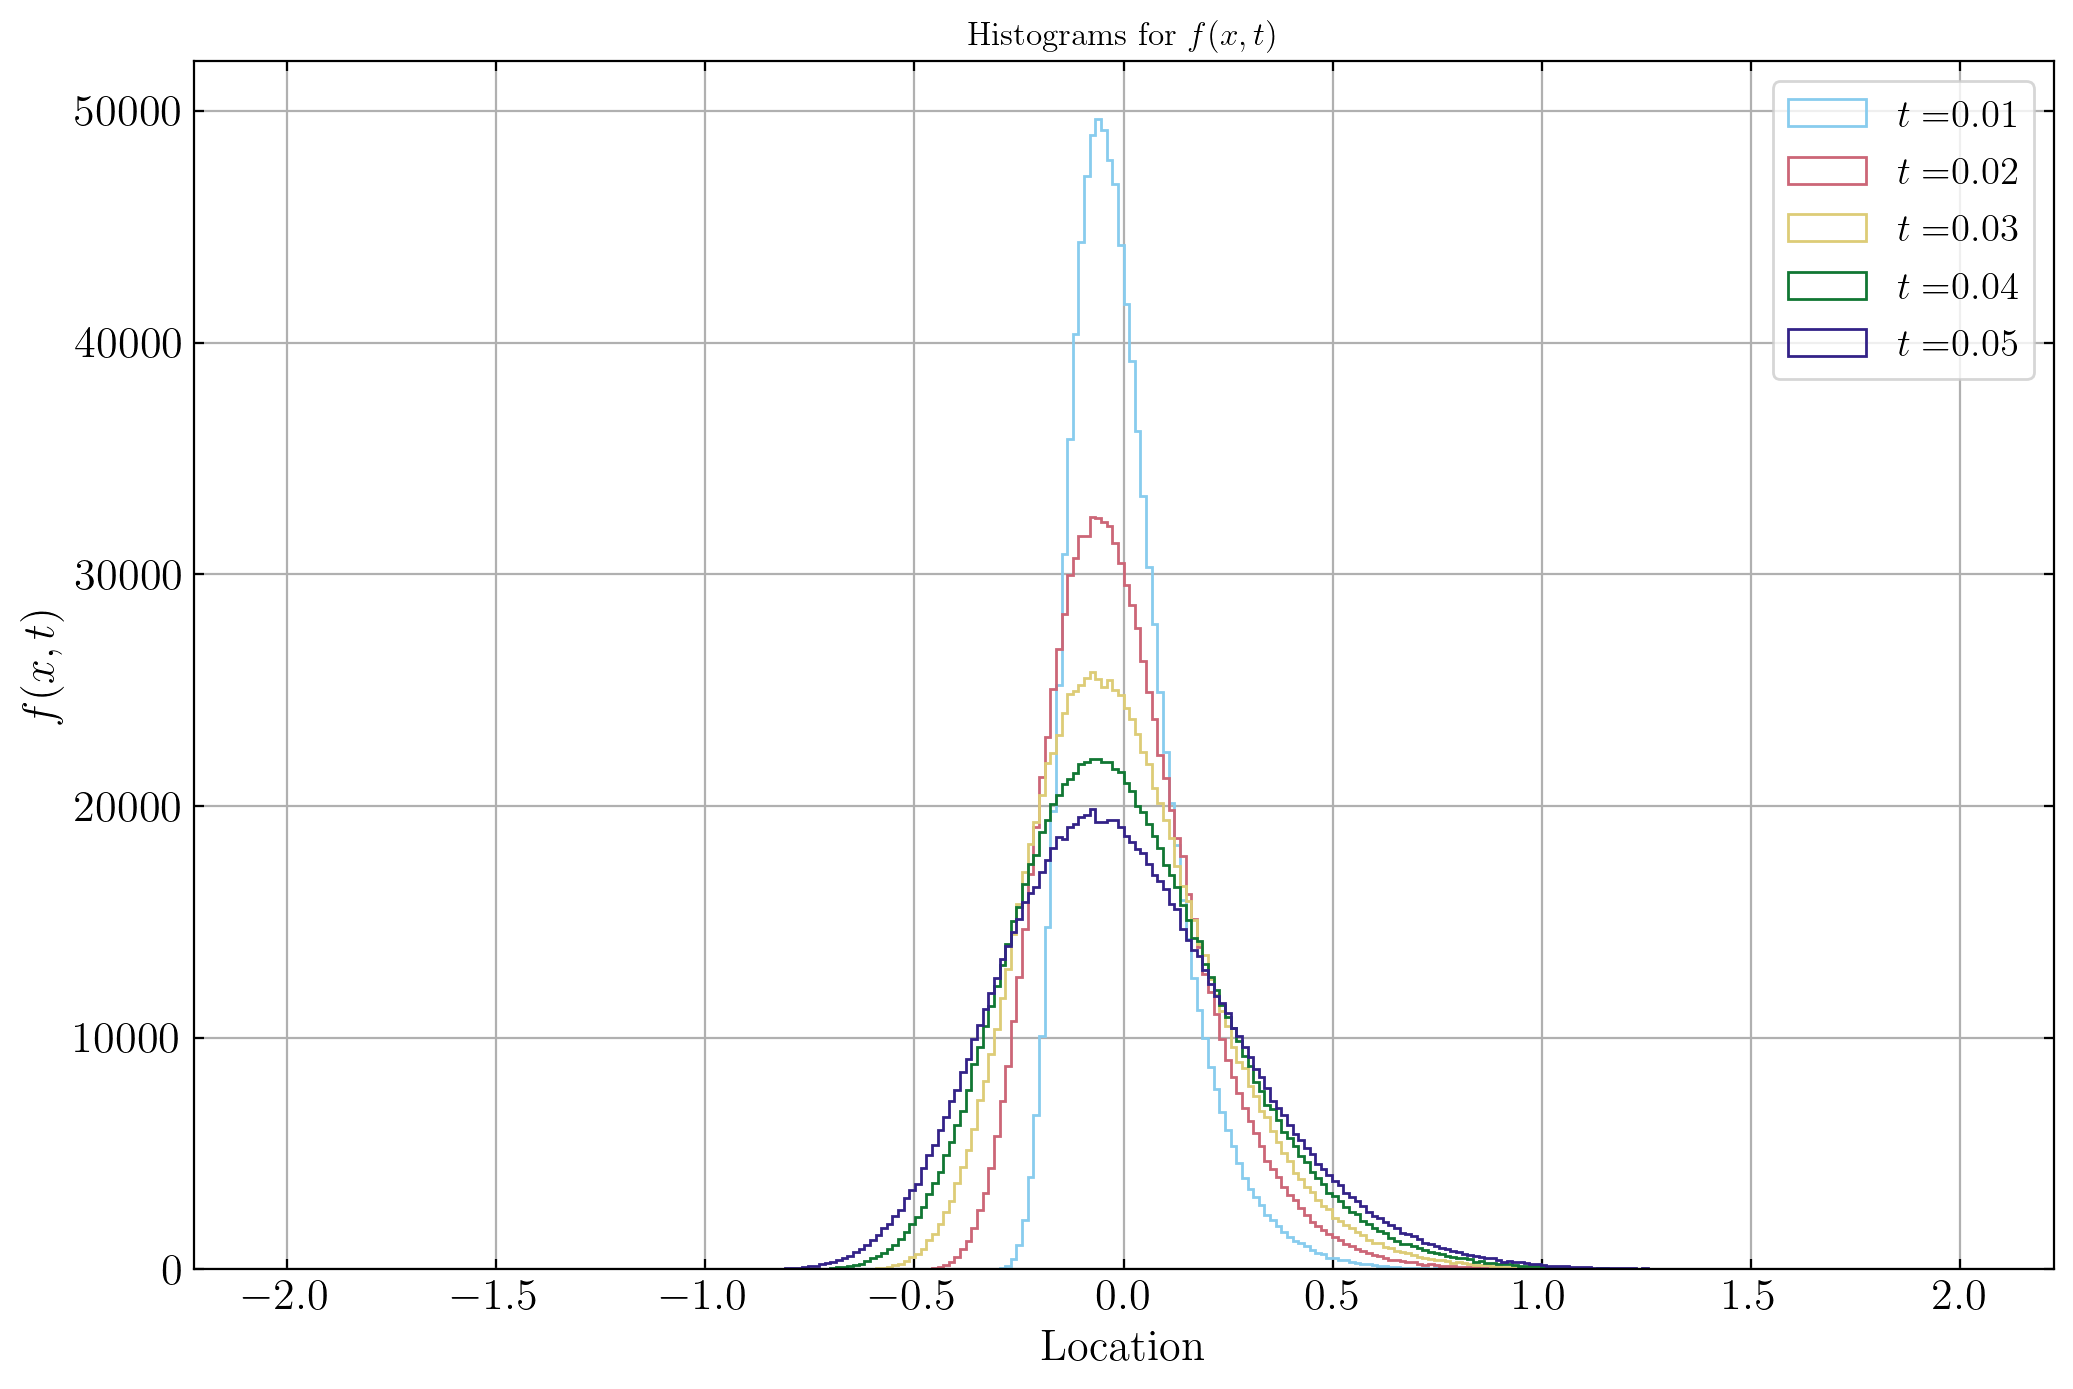

In [14]:
walk = np.cumsum(np.sqrt(dt)*np.random.gumbel(loc=-0.575, size=length))

P = {}
M = 0

m = 5
n = 300

for i in range(m):
    P[i] = []

for i in range(len(walk)-m):

    # center
    y = walk[i+1:i+m+1] - walk[i]
    M = max([M, max(abs(y))])

    # add to distribution
    for j in range(m):
        P[j].append(y[j])

bins = np.linspace(-M,M,n+1)
x = np.linspace(M*(1/n-1),M*(1-1/n),n)
dx = x[2]-x[1]
T = np.linspace(0,dt*(m-1),m)
U = np.zeros((n,m))
for i in range(m):
    U[:,i] = plt.hist(P[i],bins,label=r'$t = $' + str(i*dt+dt), histtype='step')[0]/float(dx*(len(walk)-m))

plt.xlabel('Location')
plt.ylabel(r'$f(x,t)$')
plt.title(r'Histograms for $f(x,t)$')
plt.legend(loc = 'upper right', fontsize = 14)

In [16]:
Ut,R,rhs_des = build_linear_system(U, dt, dx, D=4, P=5, time_diff = 'FD', space_diff = 'poly', deg_x = 4)

print("Candidate functions for PDE")
for func in ['1'] + rhs_des[1:]:
    print(func)

print("\nPDE derived from data:")
w = TrainSTRidge(R, Ut, 10**-2, 10, normalize = 2)
print_pde(w, rhs_des)

Candidate functions for PDE
1
u
u^2
u^3
u^4
u^5
u_{x}
uu_{x}
u^2u_{x}
u^3u_{x}
u^4u_{x}
u^5u_{x}
u_{xx}
uu_{xx}
u^2u_{xx}
u^3u_{xx}
u^4u_{xx}
u^5u_{xx}
u_{xxx}
uu_{xxx}
u^2u_{xxx}
u^3u_{xxx}
u^4u_{xxx}
u^5u_{xxx}
u_{xxxx}
uu_{xxxx}
u^2u_{xxxx}
u^3u_{xxxx}
u^4u_{xxxx}
u^5u_{xxxx}

PDE derived from data:


..\PDE_FIND.py:443: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w_best = np.linalg.lstsq(TrainR, TrainY)[0]
..\PDE_FIND.py:589: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if lam != 0: w = np.linalg.lstsq(X.T.dot(X) + lam*np.eye(d),X.T.dot(y))[0]
..\PDE_FIND.py:615: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old,

u_t = (-0.069027 +0.000000i)u_{xxx}
    + (-0.008243 +0.000000i)u_{xxxx}
    + (-0.004165 +0.000000i)uu_{xxxx}
   


In [ ]:
sys.path.insert(0, 'c:/Users/Jeremiah/sciebo/Bachelor-Arbeit/field_1d_with_CPC/')
from field_1d_implementation import generate_strained_field, generate_strained_field_with_CPC

In [ ]:
B_CPC = generate_strained_field_with_CPC(5, 12, 0)
B = generate_strained_field(5, 12, 0)
t = np.linspace(0, 1, B.size)
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, B_CPC)
axes[1].plot(t, B)